# Redes Neuronales con Scikit-Learn: una introducción - Parte 2

Práctica ANN-3:
Modifique el código, a fin de incorporar las siguientes modificaciones:

Incorporar Hot Encoding y contar con 3 salidas en lugar de 1. Compare los resultados.
Generar una gráfica donde se puedan analizar las 4 variables y cómo se distribuyen la mismas (analizadas de dos en dos). Para ello, se recomienda emplear el siguente ejemplo:

# Ejemplo básico 2: Corpus Iris
El corpus Iris es uno de los ejemplos más utilizados para aprender a diseñar redes neuronales. Este corpus tiene las siguientes características:

Posee 150 muestras de 3 tipos de flores (50 c/u): Iris-Setosa, Iris-Virgínica e Iris-Versicolor.
Cada muestra contiene 4 variables (decimales) que representan estas características de cada flor:
Longitud del pétalo
Longitud del sépalo
Grosor del pétalo
Grosor del sépalo
El objetivo consiste en diseñar y entrenar una red neuronal que permita clasificar las muestras en base a las características de dichas flores.

Lectura de los datos

Como primer paso procederemos a cargar los datos empleando para ello la librería Pandas. Para ello, emplearemos el método read_csv y dado que el fichero no tiene nombres en cada columna (los datos inician en la primera fila), especificamos los nombres que deseamos que sean cargados al leer el fichero.

Es importante observar, que el método read_csv devuelve un objeto dataframe.

In [2]:

import pandas as pd
import numpy as np

%matplotlib inline

datos = pd.read_csv('corpus/iris/iris.data',names=['longitud_sepalo','grosor_sepalo',\
                                                   'longitud_petalo','grosor_petalo','flor'])

datos.head()

,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



También podemos analizar el corpus empleando la función describe que provee Pandas. Los valores que podemos obtener de cada variable, son los siguientes:


Conteo (count)
Media (mean)
Desviación estándar (std)
Mínimo (min)
Percentiles, que son los valores que están entre 25%, 50%, 75%.
Máximo (max)

In [3]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitud_sepalo,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
grosor_sepalo,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
longitud_petalo,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
grosor_petalo,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Como podemos apreciar, la última columna contiene cadenas de texto que describen el tipo de flor. Para ello, podemos emplear la función map que provee Pandas y reemplazar las cadenas por valores numéricos que sí puedan ser entendidos por la red neuronal.

In [4]:
datos['flor']=datos['flor'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
datos.head()

,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Diseño de la Red Neuronal

Como siguiente punto, diseñaremos una red neuronal (clasificador perceptrón multicapa) para poder aprender a distinguir entre los diferentes tipos de flores.

La red neuronal artificial tendrá las sigiuentes características:

Entradas: 4

Número de capas: 2

Neuronas en la capa oculta: 7

Neuronas en la capa de salida: 1

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> c:\users\angel\anaconda3\envs\iaclass\lib\site-packages\viznet\context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


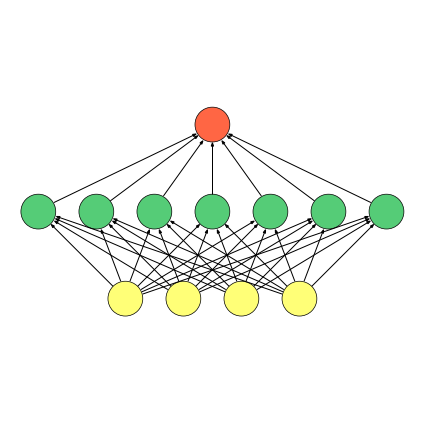

In [5]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 4
neuronas_capa_oculta = 7
neuronas_capa_salida = 1


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()

# Preprocesamiento de los datos y generación de los corpus de entrenamiento y pruebas
Como paso previo a entrenar la red neuronal, es fundamental preprocesar los datos (escalar, cambiar formatos, etc.), ya que en caso contrario no se obtendrán resultados óptimos en el proceso de clasificación.

In [6]:
# Importamos la función para separar test y train
from sklearn.model_selection import train_test_split

# Importamos la función para escalar los valores
from sklearn.preprocessing import StandardScaler


# Separamos en una variable los datos de entrada, para ello generamos una copia del dataframe
# eliminando la última columna del corpus (la que tiene los tipos de flores)
X=datos.drop('flor',axis=1)

# Procedemos de la misma forma, pero en este caso para generar un arreglo que tenga las salidas
# deseadas
d=datos['flor']

# Mostramos en pantalla los primeros datos con la función 'head'
X.head()
d.head()

# Generamos los corpus para entrenamiento y pruebas de modo que se tome el mismo número de muestras de cada clase
X_train, X_test, d_train, d_test = train_test_split(X,d,train_size=0.70,random_state=0,stratify=d)


# Generamos un objeto para escalar los valores
scaler=StandardScaler()

print(scaler)

# Ajuste solo en los datos de entrenamiento
scaler.fit(X_train)

# Escalamos el corpus de entrenamiento
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Visualizamos las 7 primeras filas de datos
X_train[1:7,:]


StandardScaler(copy=True, with_mean=True, with_std=True)


array([[ 2.14194987,  1.67393943,  1.63709442,  1.31005616],
       [ 0.62547602,  0.34908787,  0.85828251,  1.44106177],
       [-1.47425699,  1.23232224, -1.53378264, -1.31005616],
       [-0.77434598,  0.79070506, -1.31126495, -1.31005616],
       [-1.70756066, -0.09252931, -1.36689437, -1.31005616],
       [-1.12430149, -1.41738087, -0.25430593, -0.26201123]])

# Creación, entrenamiento y validación de la Red Neuronal
A continuación emplearemos sckikit learn para crear, entrenar y probar la red neuronal MLPClassifier que se especificó con anterioridad. Los parámetros que se usarán son los siguientes:

Algoritmo para la reducción del error en el entrenamiento: lbfgs optimizador basado en métodos cuasi-Newtonianos. Mayor información en este link.
Función de activación de las neuronas: logística (logistic)
Máximo número de iteraciones (max_iter): 10000

In [7]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(X_train,d_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 1), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 1), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)

# Predicción y evaluación de la red
El último paso es evaluar el funcionamiento de la red. Para ello, determinaremos cómo se comporta en tareas de predicción con la parte de pruebas (X_test, d_test):

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(d_test.value_counts())

prediccion = mlp.predict(X_test)
print('Matriz de Confusion\n')
print(confusion_matrix(d_test, prediccion))
print('\n')

print(classification_report(d_test, prediccion))

2    15
1    15
0    15
Name: flor, dtype: int64
Matriz de Confusion

[[15  0  0]
 [ 0 13  2]
 [ 1  0 14]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.87      0.93        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



# Práctica ANN-3:
Modifique el código anterior, a fin de incorporar las siguientes modificaciones:

Incorporar Hot Encoding y contar con 3 salidas en lugar de 1. Compare los resultados.

Generar una gráfica donde se puedan analizar las 4 variables y cómo se distribuyen la mismas (analizadas de dos en dos). Para ello, se recomienda emplear el siguente ejemplo:

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

lenc = LabelEncoder()
encoded = lenc.fit_transform(d)
#print('Salidas Sin Modificar 1\n')
#print(integer_encoded)
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded = encoded.reshape(len(encoded), 1)
dm = enc.fit_transform(encoded)
#print('Salidas Modificadas 3\n')
#print(d2)
#print('')

# Generamos los corpus para entrenamiento y pruebas de modo que se tome el mismo número de muestras de cada clase
X_train, X_test, d_train, d_test = train_test_split(X,dm,train_size=0.70,random_state=0,stratify=dm)


# Generamos un objeto para escalar los valores
scaler=StandardScaler()

# Ajuste solo en los datos de entrenamiento
scaler.fit(X_train)

# Escalamos el corpus de entrenamiento
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Visualizamos las 7 primeras filas de datos
X_train[1:7,:]

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, 3))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(X_train,d_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)

C:\Users\Angel\Anaconda3\envs\iaclass\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Angel\Anaconda3\envs\iaclass\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


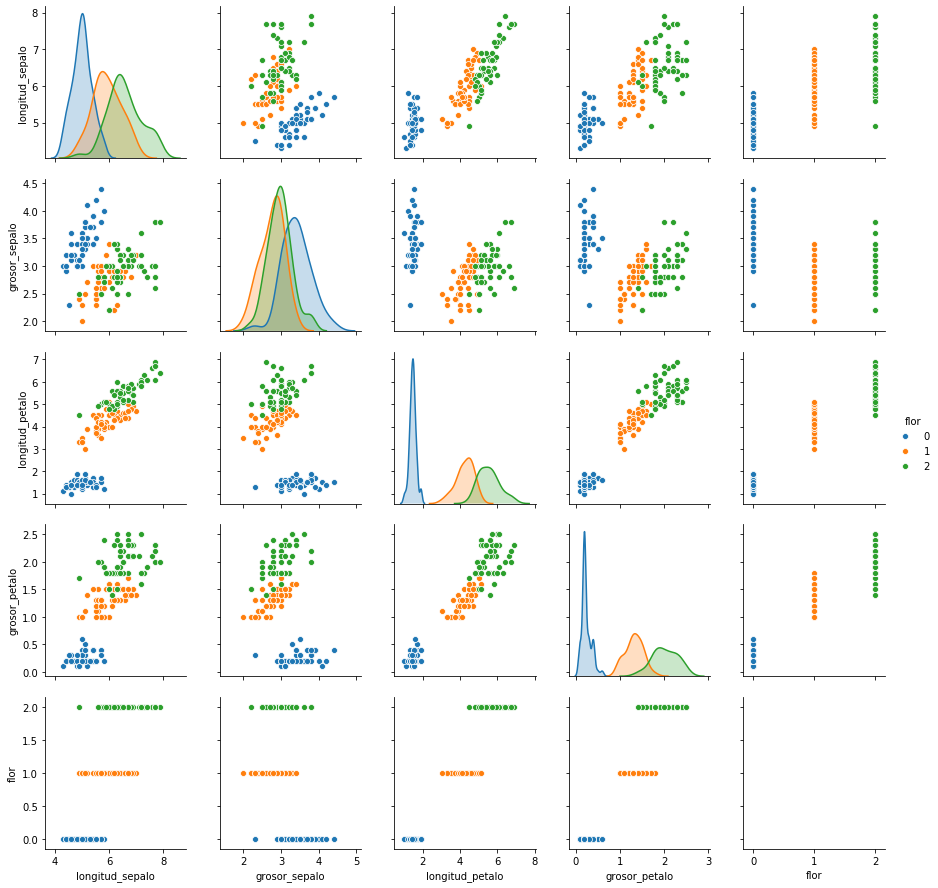

In [11]:
sns.pairplot(datos,hue='flor')

# Práctica ANN-4:
Reproducir el mismo experimento para el corpus del censo realizado en el año 1996 (censo), considerando las siguientes premisas:

Realizar todas las fases de diseño, entrenamiento y validación de la red neuronal

Probar la red con el método de validación visto, y realizar el contraste de forma manual

Realizar la gráfica de los datos

In [12]:
censo = pd.read_csv('corpus/censo/censo.data', skipinitialspace=True, names=['edad','clase_trabajo',\
                                                   'fnlwgt','educacion','num_educacion',\
                                                   'estado_civil','ocupacion','relacion',\
                                                   'raza','sexo','ganancia_capital',\
                                                   'perdida_capital','horas_semana','pais_origen',\
                                                   'estado'], index_col=0)

censo['sexo']=censo['sexo'].map({'Female':0,'Male':1})
datos.head()

,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitud_sepalo,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
grosor_sepalo,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
longitud_petalo,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
grosor_petalo,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
flor,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


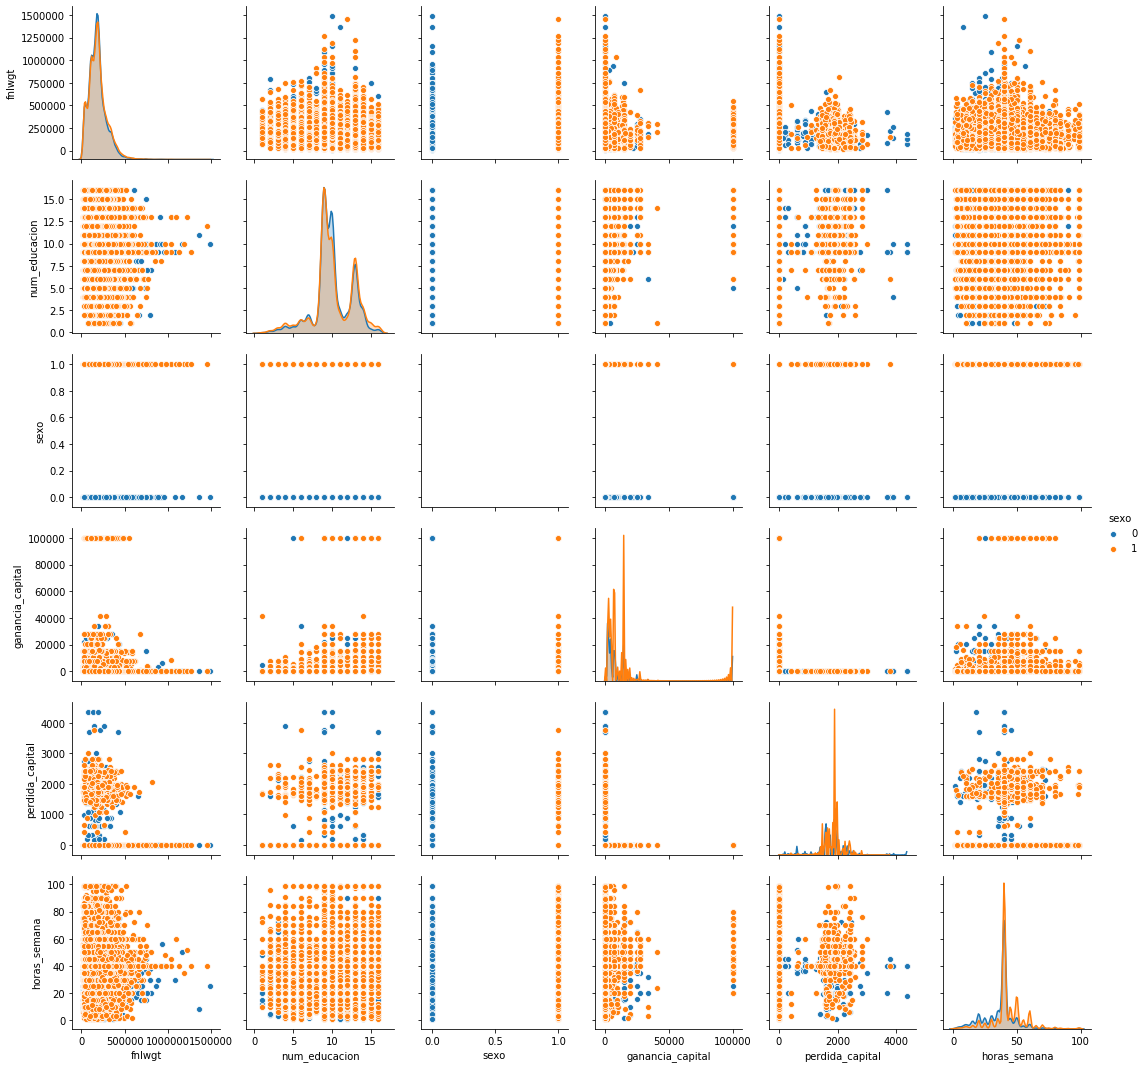

In [14]:
sns.pairplot(censo, hue='sexo')